In [67]:
import numpy as np
import matlab.engine
import os
import signal
import time
import scipy.io as sio
import time
import subprocess
import matplotlib.pyplot as plt

In [68]:
forward_tx_gain = 10
forward_rx_gain = 15
backward_tx_gain = 15
backward_rx_gain = 20

In [69]:

string1 = 'python3 TX_Feedback.py -tx_gain ' + str(forward_tx_gain)
string2 = 'python3 RX_Feedback.py -rx_gain ' + str(forward_rx_gain)
string3 = 'python3 TX_Feedback.py -rx_gain ' + str(backward_rx_gain)
string4 = 'python3 RX_Feedback.py -rx_gain ' + str(backward_tx_gain)

In [70]:
# Message generation
subprocess.call(string1 + ' -dev_type encoder -num 1', shell= True)


PROCESS BEGINS

TX Encoder 1 generated
TX Transmission 1 starts


0

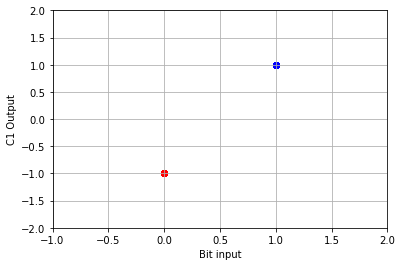

In [71]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

C1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/C1_Output.mat')
C1_Output = C1_Output['C1_Output']


plt.scatter(Bit_Input[np.where(Bit_Input==0)], C1_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(Bit_Input[np.where(Bit_Input==1)], C1_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Bit input')
plt.ylabel('C1 Output')
plt.grid(True)
plt.xlim([-1, 2])
plt.ylim([-2, 2])
plt.show()

In [72]:
# Receiver receives first message
subprocess.call(string2 + ' -dev_type decoder -num 1', shell= True)

# Transmitter process kill
subprocess.call('python3 /home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/flowgraph_process_kill.py', shell= True)

RX Reception 1 starts
Capture : 1 ...
Capture done
Frame: 0  SNR:  28.56  BER: 0.0000

All frames captured

Process Successfully terminated


0

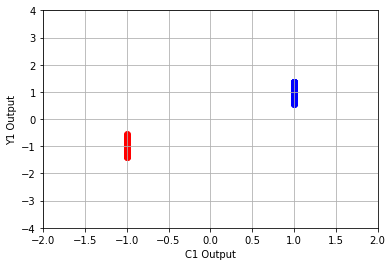

In [73]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

C1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/C1_Output.mat')
C1_Output = C1_Output['C1_Output']

Y1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y1_Output.mat')
Y1_Output = Y1_Output['Y1_Output']


plt.scatter(C1_Output[np.where(Bit_Input==0)], Y1_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(C1_Output[np.where(Bit_Input==1)], Y1_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('C1 Output')
plt.ylabel('Y1 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-4, 4])
plt.show()

In [74]:
# first Feedback prepared by receiver
subprocess.call(string4 + ' -dev_type encoder -num 1', shell= True)

RX Encoder 1 generated
RX Transmission 1 starts


0

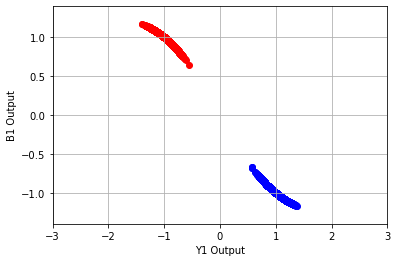

In [75]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

Y1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y1_Output.mat')
Y1_Output = Y1_Output['Y1_Output']

B1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/B1_Output.mat')
B1_Output = B1_Output['B1_Output']


plt.scatter(Y1_Output[np.where(Bit_Input==0)], B1_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(Y1_Output[np.where(Bit_Input==1)], B1_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Y1 Output')
plt.ylabel('B1 Output')
plt.grid(True)
plt.xlim([-3, 3])
plt.ylim([-1.4, 1.4])
plt.show()

In [76]:
# Transmitter received feedback
subprocess.call(string3 + ' -dev_type decoder -num 1', shell= True)

# Receiver transmitter process killed
subprocess.call('python3 flowgraph_process_kill.py', shell= True)

TX Reception 1 starts
Capture : 1 ...
Capture done
Frame: 0  SNR:  21.81

All frames captured

Process Successfully terminated


0

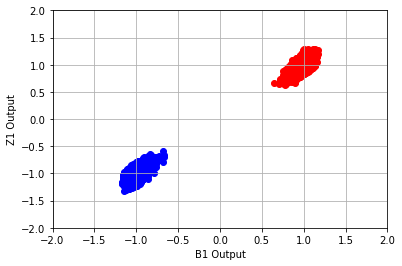

In [77]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

B1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/B1_Output.mat')
B1_Output = B1_Output['B1_Output']

Z1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Z1_Output.mat')
Z1_Output = Z1_Output['Z1_Output']


plt.scatter(B1_Output[np.where(Bit_Input==0)], Z1_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(B1_Output[np.where(Bit_Input==1)], Z1_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('B1 Output')
plt.ylabel('Z1 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [78]:
# Feedback received and second transmission prepared
subprocess.call(string1 + ' -dev_type encoder -num 2', shell= True)

TX Encoder 2 generated
TX Transmission 2 starts


0

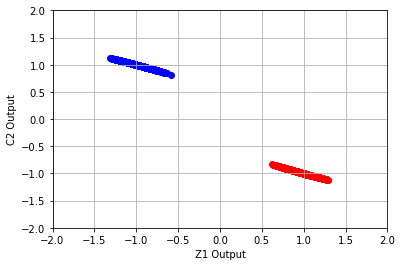

In [79]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

Z1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Z1_Output.mat')
Z1_Output = Z1_Output['Z1_Output']

C2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/C2_Output.mat')
C2_Output = C2_Output['C2_Output']


plt.scatter(Z1_Output[np.where(Bit_Input==0)], C2_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(Z1_Output[np.where(Bit_Input==1)], C2_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Z1 Output')
plt.ylabel('C2 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [80]:
# Receiver receives second message
subprocess.call(string2 + ' -dev_type decoder -num 2', shell= True)

# Transmitter process kill
subprocess.call('python3 /home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/flowgraph_process_kill.py', shell= True)

RX Reception 2 starts
capture : 1 ...
Capture done
Frame: 0  SNR:  30.12

All frames captured

Process Successfully terminated


0

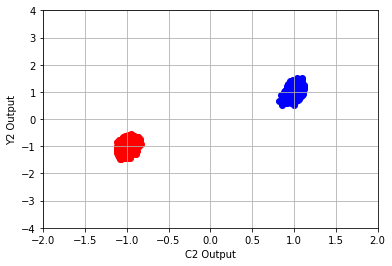

In [81]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

C2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/C2_Output.mat')
C2_Output = C2_Output['C2_Output']

Y2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y2_Output.mat')
Y2_Output = Y2_Output['Y2_Output']


plt.scatter(C2_Output[np.where(Bit_Input==0)], Y2_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(C2_Output[np.where(Bit_Input==1)], Y2_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('C2 Output')
plt.ylabel('Y2 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-4, 4])
plt.show()

In [82]:
# final feedback Feedback prepared by receiver
subprocess.call(string4 + ' -dev_type encoder -num 2', shell= True)

RX Encoder 2 generated
RX Transmission 2 started


0

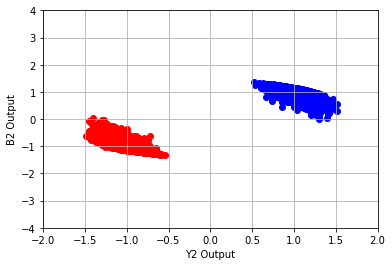

In [83]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

Y2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y2_Output.mat')
Y2_Output = Y2_Output['Y2_Output']

B2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/B2_Output.mat')
B2_Output = B2_Output['B2_Output']


plt.scatter(Y2_Output[np.where(Bit_Input==0)], B2_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(Y2_Output[np.where(Bit_Input==1)], B2_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Y2 Output')
plt.ylabel('B2 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-4, 4])
plt.show()

In [84]:
# Transmitter receives second feedback
subprocess.call(string3 +' -dev_type decoder -num 2', shell= True)

# Receiver transmitter process killed
subprocess.call('python3 flowgraph_process_kill.py', shell= True)

TX Reception 2 starts
capture : 1 ...
Capture done
Frame: 0  SNR:  21.55

All frames captured

Process Successfully terminated


0

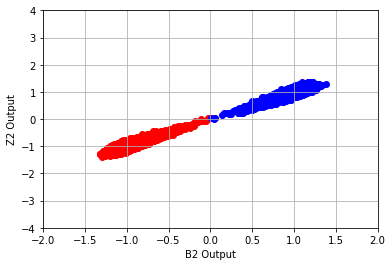

In [85]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

B2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/B2_Output.mat')
B2_Output = B2_Output['B2_Output']

Z2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Z2_Output.mat')
Z2_Output = Z2_Output['Z2_Output']


plt.scatter(B2_Output[np.where(Bit_Input==0)], Z2_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(B2_Output[np.where(Bit_Input==1)], Z2_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('B2 Output')
plt.ylabel('Z2 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-4, 4])
plt.show()

In [86]:
# Feedback received and second transmission prepared
subprocess.call(string1 + ' -dev_type encoder -num 3', shell= True)

TX Encoder 2 generated
TX Transmission 3 starts


0

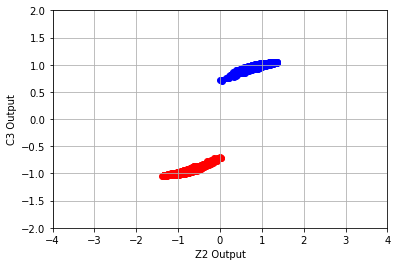

In [87]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

Z2_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Z2_Output.mat')
Z2_Output = Z2_Output['Z2_Output']

C3_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/C3_Output.mat')
C3_Output = C3_Output['C3_Output']


plt.scatter(Z2_Output[np.where(Bit_Input==0)], C3_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(Z2_Output[np.where(Bit_Input==1)], C3_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Z2 Output')
plt.ylabel('C3 Output')
plt.grid(True)
plt.xlim([-4, 4])
plt.ylim([-2, 2])
plt.show()

In [88]:
# Receiver receives final message
subprocess.call(string2 + ' -dev_type decoder -num 3', shell= True)

# Transmitter process kill
subprocess.call('python3 /home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/flowgraph_process_kill.py', shell= True)

RX Reception 3 starts
capture : 1 ...
Capture done
Frame: 0  SNR:  21.55

All frames captured

Process Successfully terminated


0

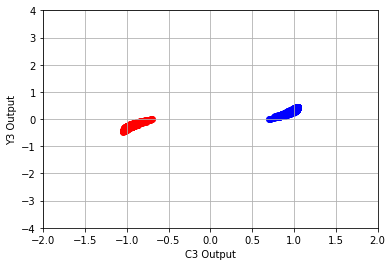

In [89]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

C3_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/C3_Output.mat')
C3_Output = C3_Output['C3_Output']

Y3_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y3_Output.mat')
Y3_Output = Y3_Output['Y3_Output']


plt.scatter(C3_Output[np.where(Bit_Input==0)], Y3_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(C3_Output[np.where(Bit_Input==1)], Y3_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('C3 Output')
plt.ylabel('Y3 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-4, 4])
plt.show()

In [90]:
# Receiver does final decoding
subprocess.call('python3 RX_Feedback.py -dev_type encoder -num 3', shell= True)

Final Decoding starts
Frame: 1  BER: 0.0000

Process Ended



0

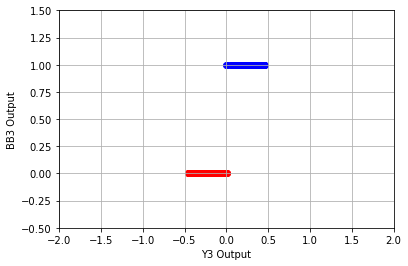

In [91]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

Y3_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y3_Output.mat')
Y3_Output = Y3_Output['Y3_Output']

BB3_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/BB3_Output.mat')
BB3_Output = BB3_Output['BB3_Output']


plt.scatter(Y3_Output[np.where(Bit_Input==0)], BB3_Output[np.where(Bit_Input==0)], color = 'r')
plt.scatter(Y3_Output[np.where(Bit_Input==1)], BB3_Output[np.where(Bit_Input==1)], color = 'b')
plt.xlabel('Y3 Output')
plt.ylabel('BB3 Output')
plt.grid(True)
plt.xlim([-2, 2])
plt.ylim([-0.5, 1.5])
plt.show()

In [92]:
Bit_Input = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Bit_Input.mat')
Bit_Input = Bit_Input['Bit_Input']

Y1_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/Y1_Output.mat')
Y1_Output = Y1_Output['Y1_Output']

BB3_Output = sio.loadmat('/home/rajesh/ActiveFeedback/WirelessDL/Python/Automation/Feedback_Files/BB3_Output.mat')
BB3_Output = BB3_Output['BB3_Output']

D1_output = np.zeros((len(Y1_Output),1))
D2_output = np.zeros((len(BB3_Output),1))

D1_output = np.where(Y1_Output>0, D1_output, 1)
D2_output = np.where(BB3_Output>0.5, D2_output, 1)

BER1 = 1 - sum(abs(D1_output - Bit_Input))/len(Bit_Input)
BER2 = 1 - sum(abs(D2_output - Bit_Input))/len(Bit_Input)

print('Initial BER: ' , BER1)
print('Final BER: ' , BER2)

Initial BER:  [0.]
Final BER:  [0.]


In [93]:
subprocess.call('python3 flowgraph_process_kill.py', shell= True)


Process Successfully terminated


0